##### librerie

In [66]:
import os
import sys
import time
import numpy as np
sys.path.append(os.path.abspath('../lib'))
import matplotlib.pyplot as plt
from StarsTracker import StarsTracker

## 1. Algorithm Computational time test

#### 1.1 tempo computazionale vs numero immagini

In [67]:
speed = []
speed_err = []
n_images = []

parms = [0.25, 1, 30, 5, 10, 40]


data_dir = '../images/21_12_2024/partials_for_speed_test'

for dir in [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]:
    print(f'analizzo dati folder: {data_dir}/{dir}')

    # aggiunge il numero di immagini 
    n = int(dir.split('_')[1])
    n_images.append(n)

    times = []

    min_magnitude, max_magnitude, group, smls_np, filter_value, src_size = parms
    
    for i in range(10):
        print(f'    test algo {i}')
        track = StarsTracker(f'{data_dir}/{dir}', [min_magnitude, max_magnitude, group, smls_np])
        # track e tracking time
        start_time = time.time()
        data = track.startTracking(filter_value, src_size)
        end_time = time.time()
        total_run_time = round(end_time - start_time, 2)

        # aggiunge il tempo di esecuzione a times
        times.append(total_run_time)
    
    speed.append(np.mean(times))
    speed_err.append(np.std(times))



print(n_images)
print(speed)
print(speed_err)

analizzo dati folder: ../images/21_12_2024/partials_for_speed_test/n_30
    test algo 0

RICERCA POSIZIONI STELLE NELL'IMMAGINE:
              
        OPZIONI DI RICERCA SELEZIONATE:
            magintudine minima =    0.25 / rgb 63
            magnitudine massima =   1 / rgb 255
            group distance =        30
            valid block dimension > 5 px
            
        
 
        Trovati 375 blocchi di pixel che rappresentano stelle
            - 238 classificati validi per analisi
            - 137 scartati
        
Analizzo immagine 29 di 29...
Tracciamento completato. Dati salvati in DataFrame.
    test algo 1

RICERCA POSIZIONI STELLE NELL'IMMAGINE:
              
        OPZIONI DI RICERCA SELEZIONATE:
            magintudine minima =    0.25 / rgb 63
            magnitudine massima =   1 / rgb 255
            group distance =        30
            valid block dimension > 5 px
            
        
 
        Trovati 375 blocchi di pixel che rappresentano stelle
        

#### 1.2 tempo computazionale vs numero stelle

In [ ]:
test_parms = [
    [0.11, 1, 20, 5, 0, 20],
    [0.11, 1, 30, 5, 0, 20],
    [0.12, 1, 20, 5, 0, 20],
    [0.12, 1, 30, 5, 0, 20],
    [0.13, 1, 20, 5, 0, 20],
    [0.13, 1, 30, 5, 0, 20],
    [0.14, 1, 30, 5, 0, 20],
    [0.15, 1, 30, 5, 0, 20],
    [0.17, 1, 30, 5, 0, 20],
    [0.2, 1, 30, 5, 0, 20],
    [0.25, 1, 30, 5, 0, 20],
    [0.3, 1, 30, 5, 0, 20],
    [0.35, 1, 30, 5, 0, 20],
    [0.40, 1, 30, 5, 0, 20],
    [0.45, 1, 30, 5, 0, 20],
    [0.50, 1, 30, 5, 0, 20],
    [0.35, 1, 30, 10, 0, 20],
    [0.40, 1, 30, 10, 0, 20],
    [0.45, 1, 30, 10, 0, 20],
    [0.50, 1, 30, 10, 0, 20]
    ]


# test_parms = [[0.15, 1, 30, 5, 10, 20]]

speed_stars = []
speed_stars_err = []
n_stars = []

images_dir = '../images/21_12_2024/partials_for_speed_test/n_200'

for parms in test_parms:
        # unpacking dei parametri
        min_magnitude, max_magnitude, group, smls_np, filter_value, src_size = parms

        times = []
        
        for i in range(10):

            track = StarsTracker(images_dir, [min_magnitude, max_magnitude, group, smls_np])
            # track e tracking time
            start_time = time.time()
            data = track.startTracking(filter_value, src_size)
            end_time = time.time()
            total_run_time = round(end_time - start_time, 2)
            times.append(total_run_time)

            time.sleep(6)

        # numero di stelle
        n_str = len(track.n_valid_for_analysis)

        speed_stars.append(np.mean(times))
        speed_stars_err.append(np.std(times))
        n_stars.append(n_str)





#### 1.3 Data saving

In [152]:
# salvataggio dei dati
import pandas as pd

data_1 = {
    'numero_immagini': n_images,
    'velocita_elaborazione': speed,
    'errore_vel_el': speed_err
}

data_2 = {
    'numero_stelle': n_stars,
    'velocita_elaborazione': speed_stars,
    'errore_vel_el': speed_stars_err
}

time_images = pd.DataFrame(data_1)
time_stars = pd.DataFrame(data_2)

save_folder = '../output_data/speed_test_data'

time_images.to_csv(f'{save_folder}/times_images.csv', index=False)
time_stars.to_csv(f'{save_folder}/times_stars.csv', index=False)

#### 1.4 Plots

In [412]:
def linear_f(x, m, q):
    return m*x + q

def power_f(x, a, c, n):
    return a*x**n + c

# print(type(speed_stars_err[0]))
print(speed_stars_err)

images_data_test = pd.read_csv('../output_data/speed_test_data/times_images.csv')
stars_data_test = pd.read_csv('../output_data/speed_test_data/times_stars.csv')
images_data_test.head(20)

n_images = images_data_test['numero_immagini']
speed = images_data_test['velocita_elaborazione']
speed_err = images_data_test['errore_vel_el']

n_stars = stars_data_test['numero_stelle']
speed_stars = stars_data_test['velocita_elaborazione']
speed_stars_err = stars_data_test['errore_vel_el']

[7.380361508760935, 5.469991316263671, 6.468287563180844, 9.762869711309271, 9.492623504595555, 9.605491970742571, 3.106088376076892, 2.6524924128072462, 2.295225696963154, 0.7986764050602724, 1.241406057662037, 0.9150196719196797, 0.7228997164199205, 0.4472762010212483, 0.2336664289109571, 0.2240557966221799, 0.9845689412123453, 0.7282444644485804, 0.517599265841829, 1.1032810158794544]


[ 0.15043046 -0.12520247  1.18506251]
[0.01102515 0.19582028 1.4974973 ]


Text(0.02, 0.5, '$T_c$ [s]')

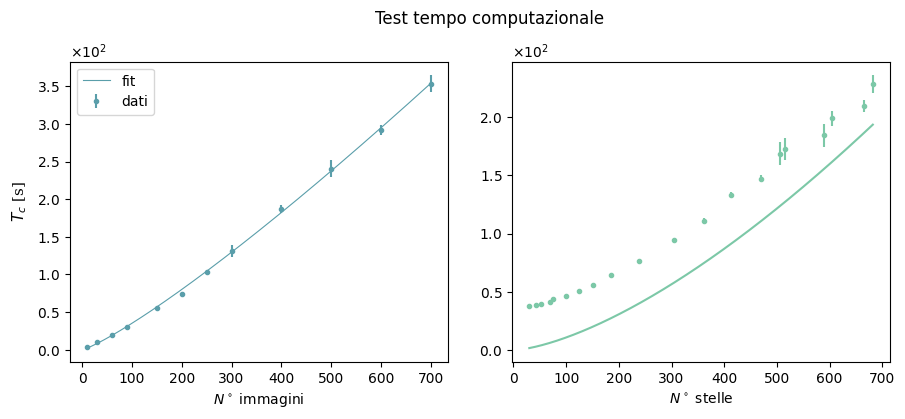

In [413]:
from scipy.optimize import curve_fit


# fit dei dati
parms, covm = curve_fit(power_f, n_images, speed)
print(parms)
xx1 = np.linspace(min(n_images), max(n_images), 2000)


speed_stars_test = [el - 36 for el in speed_stars]
parms2, covm2 = curve_fit(power_f, n_stars, speed_stars_test, sigma = speed_stars_err, absolute_sigma=False)
print(parms2)
xx2 = np.linspace(min(n_stars), max(n_stars), 2000)


# figura
fig, ax = plt.subplots(1,2, sharey=False)

fig.set_figwidth(10)
fig.set_figheight(4)

plt.subplots_adjust(left=0.08,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.85, 
                    wspace=0.17, 
                    hspace=0.3)

ax[0].errorbar(n_images, speed, speed_err, ls = '', marker = '.', markersize = 6, color='#5A9EAA', label='dati')
ax[0].plot(xx1, power_f(xx1, *parms), color='#5A9EAA', label='fit', lw = 0.8)
ax[0].set_xlabel('$N^\circ$ immagini')
ax[0].ticklabel_format(axis='y', style='scientific', scilimits=(0,0), useMathText=True)
ax[0].legend()
# ax[0].set_xscale('log')
# ax[0].set_yscale('log')

ax[1].errorbar(n_stars, speed_stars, speed_stars_err, ls = '', marker = '.', markersize = 6, color='#7CC8A7')
ax[1].plot(xx2, power_f(xx2, *parms2), color='#7CC8A7')
ax[1].set_xlabel('$N^\circ$ stelle')
ax[1].ticklabel_format(axis='y', style='scientific', scilimits=(0,0), useMathText=True)
# ax[1].set_xscale('log')
# ax[1].set_yscale('log')

fig.suptitle('Test tempo computazionale')
fig.supylabel('$T_c$ [s]', fontsize=11, fontname='Serif')

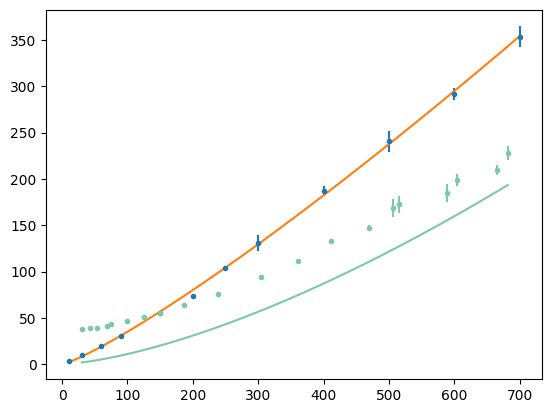

In [414]:
plt.errorbar(n_images, speed, speed_err, ls = '', marker = '.')
plt.plot(xx1, power_f(xx1, *parms))
# plt.tick_params(axis='y', labelcolor="blue")

plt.errorbar(n_stars, speed_stars, speed_stars_err, ls = '', marker = '.', color='#7CC8A7')
plt.plot(xx2, power_f(xx2, *parms2), color='#7CC8A7')
# plt.xscale('log')
# plt.yscale('log')
# plt.tick_params(axis='y', labelcolor="red")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


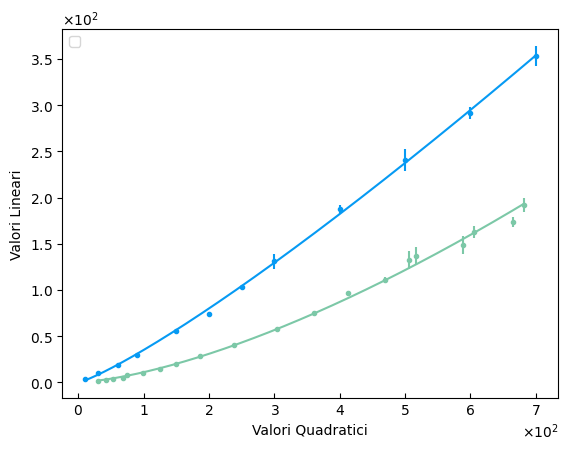

In [415]:
# Creazione della figura e degli assi


fig, ax1 = plt.subplots()

ax1.errorbar(n_images, speed, speed_err, ls = '', marker = '.', color='#069af3')
ax1.plot(xx1, power_f(xx1, *parms), color='#069af3')
ax1.set_xlabel("Numero immagini")
ax1.set_ylabel("Valori Lineari")
ax1.tick_params(axis='x', tickdir="in")
ax1.ticklabel_format(axis='both', style='scientific', scilimits=(0,0), useMathText=True)
ax1.legend(loc="upper left")
# ax1.set_yscale('log')
# ax1.set_xscale('log')


# ax2 = ax1.twinx()
ax1.errorbar(n_stars, speed_stars_test, speed_stars_err, ls = '', marker = '.', color='#7CC8A7')
ax1.plot(xx2, power_f(xx2, *parms2), color='#7CC8A7')
ax1.set_xlabel("Valori Quadratici")
ax1.tick_params(axis='x', tickdir="in")
ax1.legend(loc="upper left")
ax1.ticklabel_format(axis='x', style='scientific', scilimits=(0,0), useMathText=True)
# ax2.set_xscale('log')




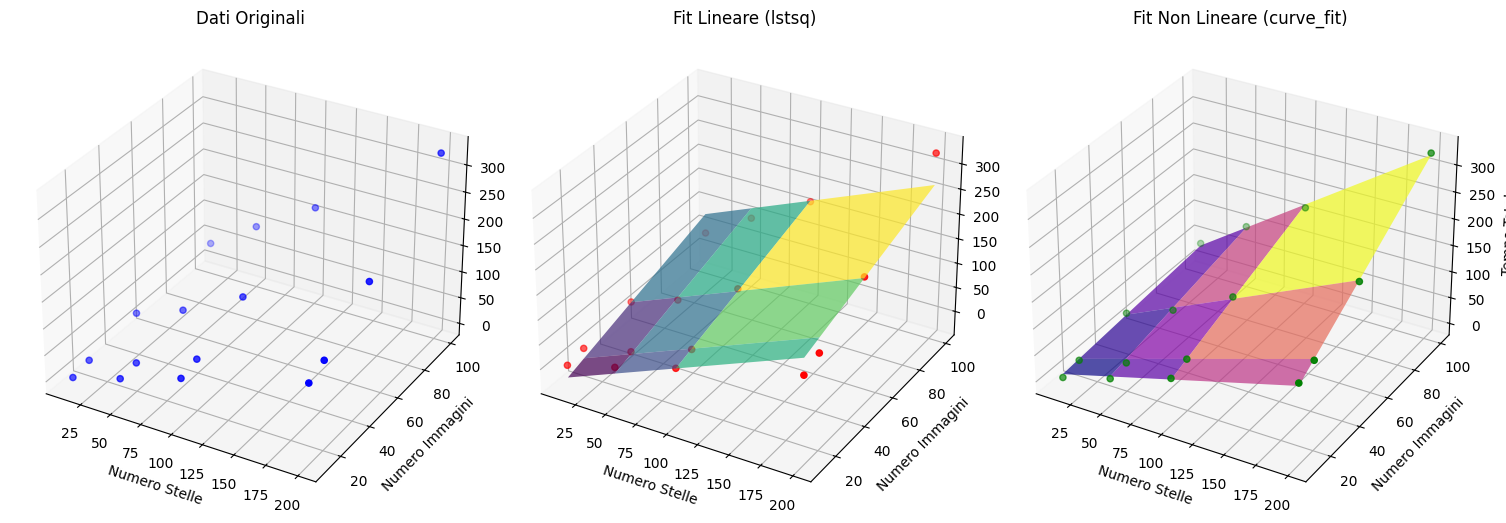

Fit Lineare (lstsq):
  a = 0.986, b = 1.128, c = -44.873

Fit Non Lineare (curve_fit):
  a = 0.010, b = 0.512, c = 0.181


In [398]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

# Simulazione dei dati
n_stars = np.array([10, 50, 100, 200])  # Numero di stelle
n_images = np.array([10, 20, 50, 100])  # Numero di immagini
X, Y = np.meshgrid(n_stars, n_images)  # Griglia delle variabili indipendenti

# Modello reale con rumore (simulazione del tempo computazionale)
def real_model(n_s, n_i):
    return 0.01 * n_s * n_i + 0.5 * n_s + 0.2 * n_i + np.random.normal(0, 5, size=n_s.shape)

T = real_model(X, Y)  # Tempo simulato

# Flatten per il fit
X_flat = X.ravel()
Y_flat = Y.ravel()
T_flat = T.ravel()

# Fit lineare con lstsq
A = np.vstack([X_flat, Y_flat, np.ones_like(X_flat)]).T
coeffs, _, _, _ = np.linalg.lstsq(A, T_flat, rcond=None)
a_lstsq, b_lstsq, c_lstsq = coeffs

# Fit non lineare con curve_fit
def model(x, a, b, c):
    n_s, n_i = x
    return a * n_s * n_i + b * n_s + c * n_i

popt, pcov = curve_fit(model, np.array([X_flat, Y_flat]), T_flat)
a_curvefit, b_curvefit, c_curvefit = popt

# Ricostruzione dei modelli fittati
T_fit_lstsq = (a_lstsq * X + b_lstsq * Y + c_lstsq).reshape(X.shape)
T_fit_curvefit = model((X, Y), *popt).reshape(X.shape)

# Visualizzazione dei risultati
fig = plt.figure(figsize=(15, 12))

# Dati originali
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X, Y, T, color='blue', label="Dati Originali")
ax1.set_title("Dati Originali")
ax1.set_xlabel("Numero Stelle")
ax1.set_ylabel("Numero Immagini")
ax1.set_zlabel("Tempo Totale")

# Fit lineare (lstsq)
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, T_fit_lstsq, cmap='viridis', alpha=0.7, label="Fit Lineare (lstsq)")
ax2.scatter(X, Y, T, color='red', label="Dati Originali")
ax2.set_title("Fit Lineare (lstsq)")
ax2.set_xlabel("Numero Stelle")
ax2.set_ylabel("Numero Immagini")
ax2.set_zlabel("Tempo Totale")

# Fit non lineare (curve_fit)
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, T_fit_curvefit, cmap='plasma', alpha=0.7, label="Fit Non Lineare (curve_fit)")
ax3.scatter(X, Y, T, color='green', label="Dati Originali")
ax3.set_title("Fit Non Lineare (curve_fit)")
ax3.set_xlabel("Numero Stelle")
ax3.set_ylabel("Numero Immagini")
ax3.set_zlabel("Tempo Totale")

plt.tight_layout()
plt.show()

# Stampa dei risultati
print("Fit Lineare (lstsq):")
print(f"  a = {a_lstsq:.3f}, b = {b_lstsq:.3f}, c = {c_lstsq:.3f}")

print("\nFit Non Lineare (curve_fit):")
print(f"  a = {a_curvefit:.3f}, b = {b_curvefit:.3f}, c = {c_curvefit:.3f}")





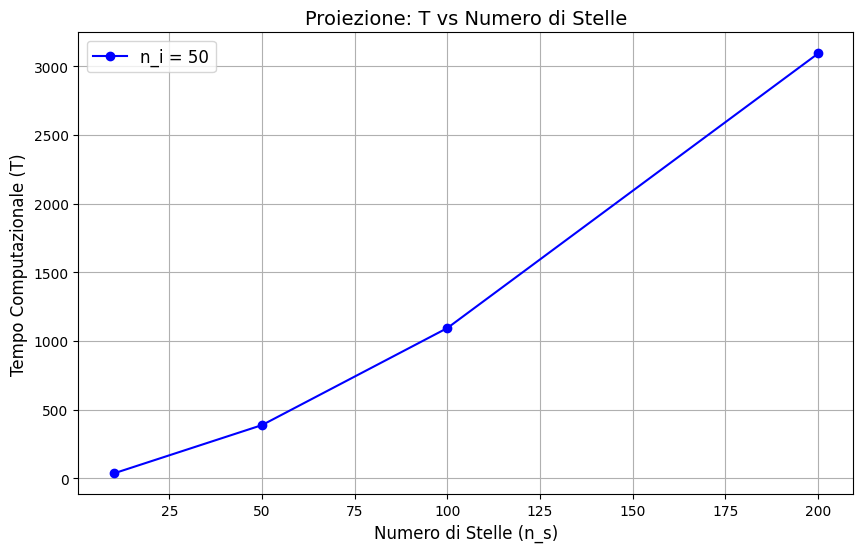

In [386]:
# Proiezione su un asse fisso (fisso n_i = 50)
fixed_n_images = 50
T_projection = 0.01 * n_stars**1.5 * fixed_n_images**1.2

plt.figure(figsize=(10, 6))
plt.plot(n_stars, T_projection, 'b-o', label=f"n_i = {fixed_n_images}")
plt.xlabel("Numero di Stelle (n_s)", fontsize=12)
plt.ylabel("Tempo Computazionale (T)", fontsize=12)
plt.title("Proiezione: T vs Numero di Stelle", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

